In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("personality_dataset.csv")

In [3]:
# Define numeric and categorical columns
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing'] 

In [4]:
# Exploratory Data Analysis (EDA)

In [5]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [6]:
print(df.shape)

(5000, 8)


In [7]:
print(df.dtypes)

Time_spent_Alone              int64
Stage_fear                   object
Social_event_attendance       int64
Going_outside                 int64
Drained_after_socializing    object
Friends_circle_size           int64
Post_frequency                int64
Personality                  object
dtype: object


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           5000 non-null   int64 
 1   Stage_fear                 5000 non-null   object
 2   Social_event_attendance    5000 non-null   int64 
 3   Going_outside              5000 non-null   int64 
 4   Drained_after_socializing  5000 non-null   object
 5   Friends_circle_size        5000 non-null   int64 
 6   Post_frequency             5000 non-null   int64 
 7   Personality                5000 non-null   object
dtypes: int64(5), object(3)
memory usage: 312.6+ KB
None


In [9]:
print("Missing values in each column: ")
print(df.isnull().sum())

Missing values in each column: 
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [10]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       5000.000000              5000.000000    5000.000000   
mean           4.969000                 4.995200       3.523400   
std            3.033922                 2.862449       2.088618   
min            0.000000                 0.000000       0.000000   
25%            3.000000                 3.000000       2.000000   
50%            5.000000                 5.000000       4.000000   
75%            7.000000                 7.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          5000.000000     5000.000000  
mean              7.253200        4.759800  
std               4.045783        2.780369  
min               0.000000        0.000000  
25%               5.000000        3.000000  
50%               7.000000        5.000000  
75%              10.000000        7.000000  
max             

<Figure size 1400x800 with 0 Axes>

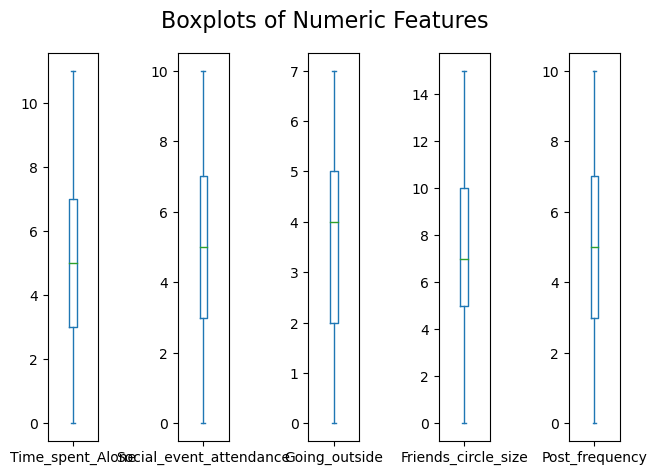

In [11]:

numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing']  # Exclude Personality (target)

# Boxplots 
plt.figure(figsize=(14, 8))  # Standardized size
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, 5), sharex=False, sharey=False)
plt.suptitle("Boxplots of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()



Value counts for Stage_fear (proportions):
No     0.5518
Yes    0.4482
Name: Stage_fear, dtype: float64

Value counts for Drained_after_socializing (proportions):
Yes    0.5506
No     0.4494
Name: Drained_after_socializing, dtype: float64

Value counts for Personality (proportions):
Introvert    0.5004
Extrovert    0.4996
Name: Personality, dtype: float64


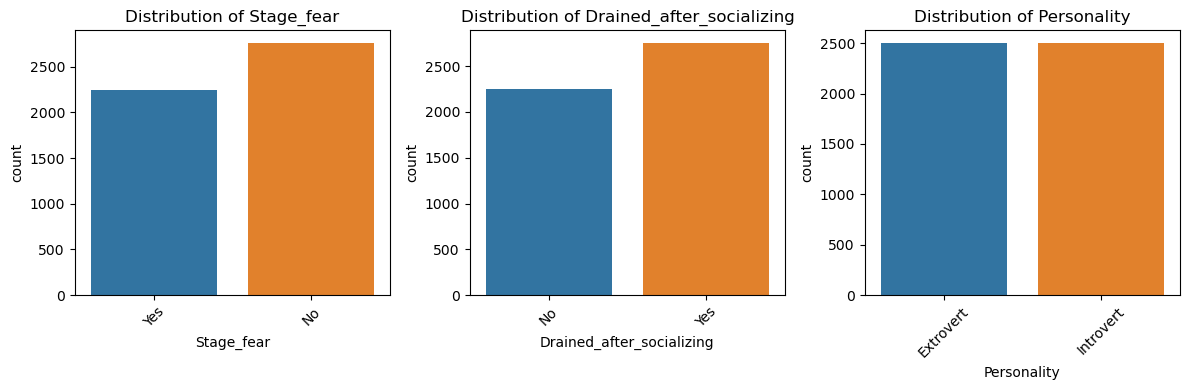

In [12]:

for col in categorical_cols + ['Personality']:  # Include target for balance check
    print(f"\nValue counts for {col} (proportions):")
    print(df[col].value_counts(normalize=True))

# Bar plots
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols + ['Personality'], 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

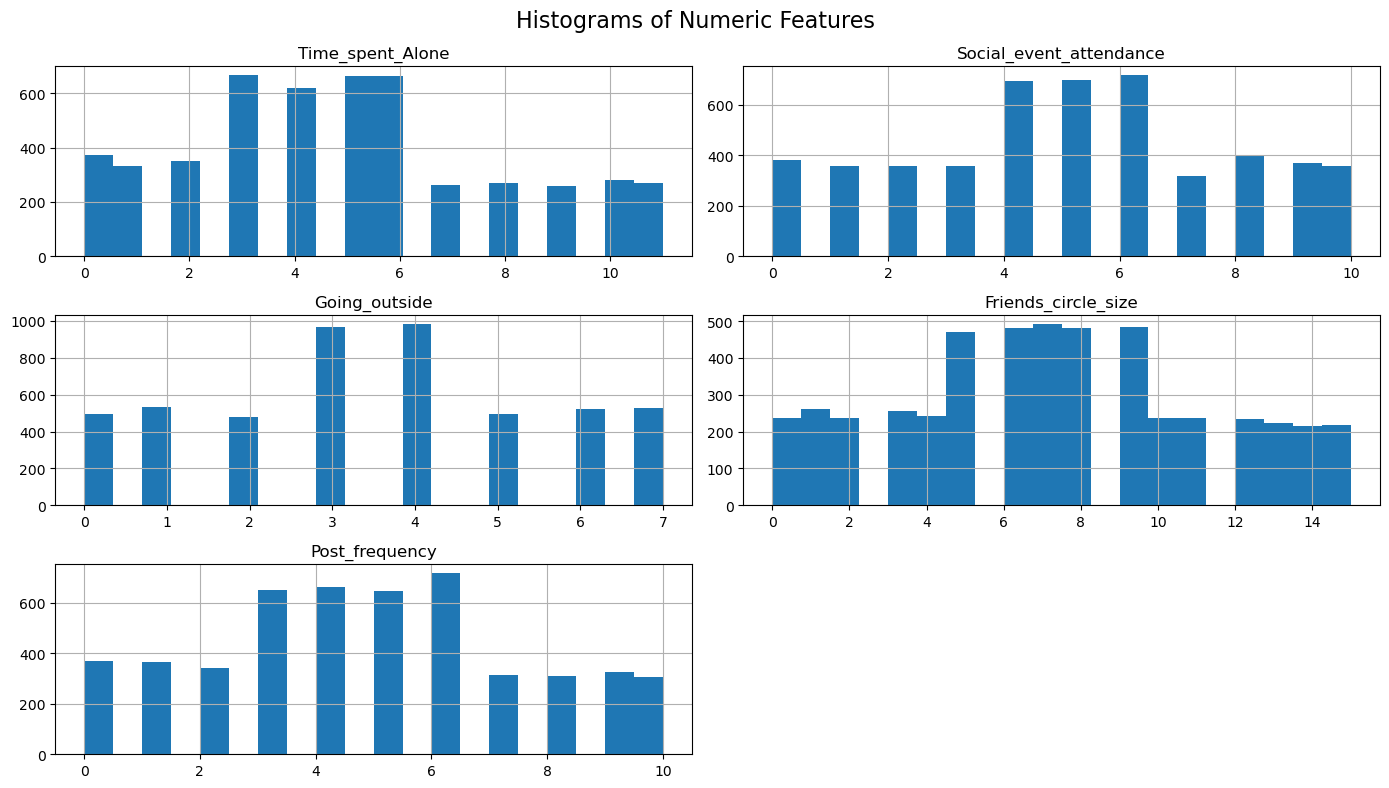

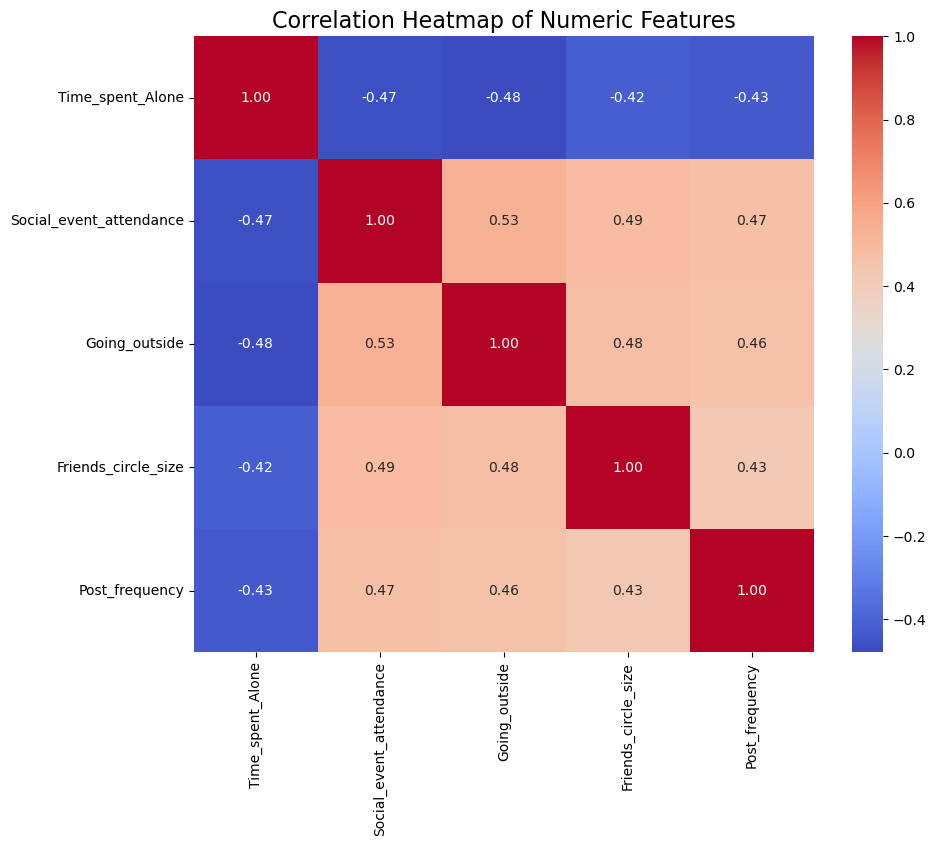

In [13]:
# Histograms for numeric distributions
df[numeric_cols].hist(bins=20, figsize=(14, 8))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()

In [14]:
print(df[numeric_cols].dtypes)

Time_spent_Alone           int64
Social_event_attendance    int64
Going_outside              int64
Friends_circle_size        int64
Post_frequency             int64
dtype: object


In [15]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [16]:
# Encode categorical variables
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
if 'Personality' in df.columns:
    df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                  'Friends_circle_size', 'Post_frequency']

In [17]:
scaler = MinMaxScaler()
numeric_cols = ['Time_spent_Alone','Social_event_attendance',
                'Going_outside','Friends_circle_size','Post_frequency']

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.272727,1,0.6,1.000000,0,0.933333,0.5,1
1,0.181818,0,0.8,0.857143,0,0.466667,0.8,1
2,0.090909,0,0.9,0.571429,0,0.600000,0.3,1
3,0.727273,0,0.0,0.000000,1,0.600000,0.3,0
4,0.454545,1,0.3,0.000000,0,0.133333,0.6,0


<Figure size 1200x600 with 0 Axes>

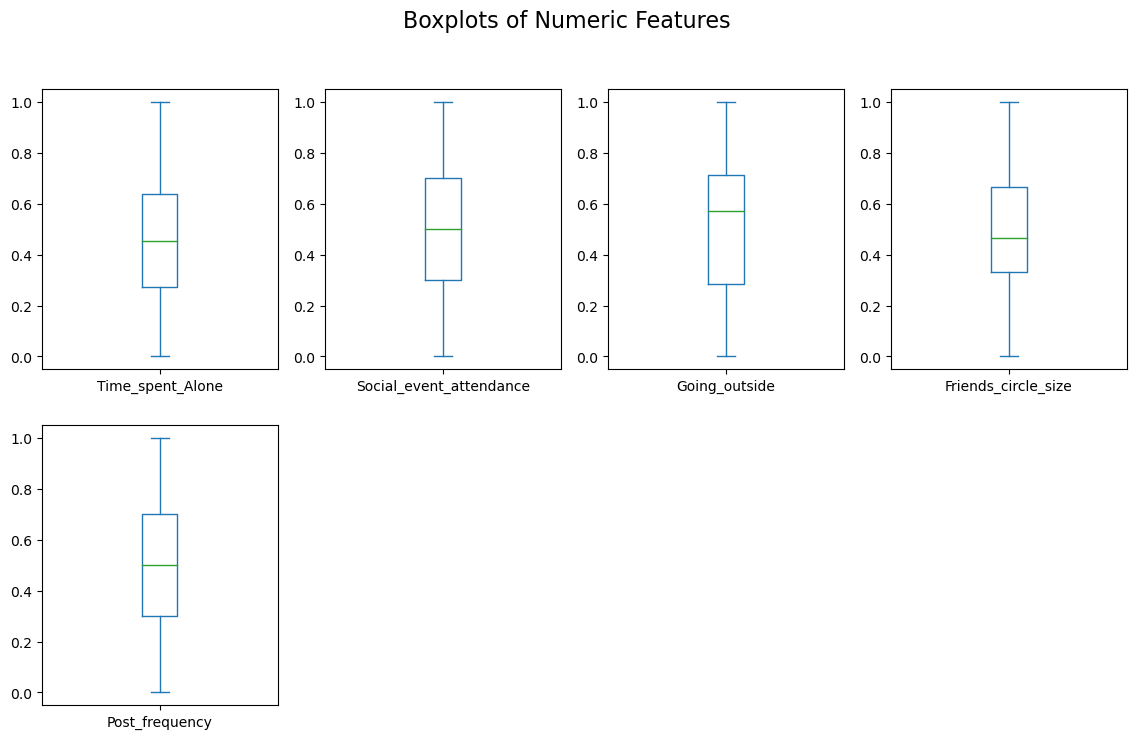

In [18]:
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

from sklearn.model_selection import train_test_split

# Features and target
X = df[numeric_cols + categorical_cols]   # or just numeric_cols if you want only numerics
y = df['Personality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Outlier handling using IQR (apply on training set, then clip test set with same bounds)
for col in numeric_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip outliers in training set
    X_train[col] = X_train[col].clip(lower_bound, upper_bound)

    # Clip test set using train-set bounds
    X_test[col] = X_test[col].clip(lower_bound, upper_bound)


plt.figure(figsize=(12,6))
df[numeric_cols].plot(kind='box', subplots=True, layout=(2,4), figsize=(14,8), sharex=False, sharey=False)
plt.suptitle("Boxplots of Numeric Features", fontsize=16)
plt.show()


In [19]:


# Instantiate the scaler
scaler = MinMaxScaler()

# Fit and transform only the numeric features
df_scaled = df.copy()  # Create a copy to avoid modifying original df
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the scaled data to verify
print("Scaled Numeric Features (head):")
print(df_scaled[numeric_cols].head())

# Optional: Describe to check min=0, max=1 for each column
print("\nSummary of Scaled Features:")
print(df_scaled[numeric_cols].describe())

Scaled Numeric Features (head):
   Time_spent_Alone  Social_event_attendance  Going_outside  \
0          0.272727                      0.6       1.000000   
1          0.181818                      0.8       0.857143   
2          0.090909                      0.9       0.571429   
3          0.727273                      0.0       0.000000   
4          0.454545                      0.3       0.000000   

   Friends_circle_size  Post_frequency  
0             0.933333             0.5  
1             0.466667             0.8  
2             0.600000             0.3  
3             0.600000             0.3  
4             0.133333             0.6  

Summary of Scaled Features:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       5000.000000              5000.000000    5000.000000   
mean           0.451727                 0.499520       0.503343   
std            0.275811                 0.286245       0.298374   
min            0.000000                 0.0000

In [20]:

X = df.drop('Personality', axis=1)  # Features
y = df['Personality']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) 

In [21]:
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 3. One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_cols = pd.DataFrame(
    encoder.fit_transform(df_scaled[categorical_cols]),
    index=df_scaled.index,   # keep same index to concat later
    columns=encoder.get_feature_names_out(categorical_cols)
)

# 4. Replace categorical cols with encoded ones
df_scaled = pd.concat([df_scaled.drop(categorical_cols, axis=1), encoded_cols], axis=1)
print(df_scaled.head())

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

In [ ]:

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform numeric features
df_scaled = df.copy()  # Copy to avoid modifying original data
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display scaled data
print("Scaled Numeric Features (StandardScaler, head):")
print(df_scaled[numeric_cols].head())

# Verify mean ≈ 0, std ≈ 1
print("\nSummary of Scaled Features:")
print(df_scaled[numeric_cols].describe())